Perceptron algorithm for data set classification

In [1]:
# import packages

import pandas as pd 
import numpy as np
import cvxpy as cp 

# read in data from files

svmdata = pd.read_excel(r'svm.xlsx')

# data

X = svmdata.iloc[:,0:2].values
y = svmdata.iloc[:,-1].values

In [2]:
def perceptron_single_step_update(feature_vector,label,current_theta,current_theta_0):
    
    if label*(feature_vector@current_theta + current_theta_0) <= 0:
        current_theta += label*feature_vector
        current_theta_0 += label
        
    return (current_theta, current_theta_0)

In [3]:
def perceptron(feature_matrix, labels, T):

    theta = np.ones(feature_matrix.shape[1])
    theta_0 = np.zeros(1)
    
    sum_theta = np.zeros(feature_matrix.shape[1])
    sum_theta_0 = np.zeros(1)
    
    update_counter = 0
    
    # updating perceptrons
    for t in range(T):
        for i in range(feature_matrix.shape[0]):
            update_counter += 1
            eta = 1/np.sqrt(update_counter)
            
            theta, theta_0 = perceptron_single_step_update(feature_matrix[i],labels[i],theta,theta_0)
            sum_theta += theta
            sum_theta_0 += theta_0
        
    return (theta, theta_0)

In [4]:
perc, inter = perceptron(X, y, 100)
print(perc)
print(inter)

[-1.397906  1.22659 ]
[0.]


In [5]:
def hyperplane_perceptron(X):
    hyp = np.empty(X.shape[0])
    for i in range(X.shape[0]):
        hyp[i] = np.dot(perc, X[i,:]) + inter
    return(hyp)

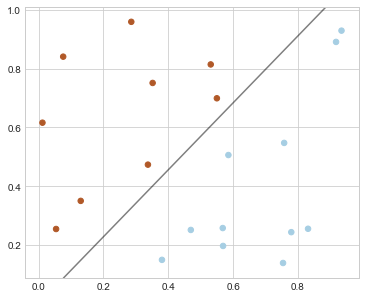

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[6,5])
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = hyperplane_perceptron(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-5, 0, 5], alpha=0.5,
        linestyles=['--', '-', '--'])

plt.savefig('perceptron.png')
plt.show()